# <h1><center>House Prices: How to teach and interest a beginner</center></h1>
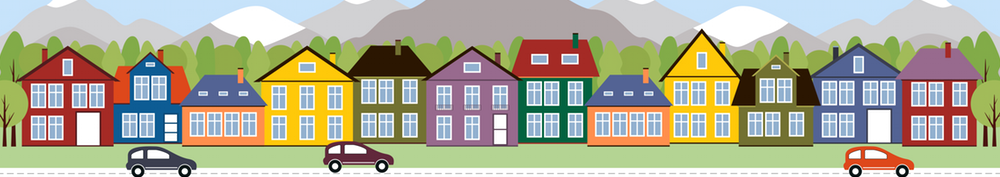

## Predict the sale price of a house in Iowa state having some data related

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, the goal of this Kaggle competition challenges you to predict the final price of each home. 

This structured notebook will take you in a simple way along a path that has many bifurcations, since data analysis is a subject that has much to explore. Here you will find a simple way to apply a Machine Learning model to predict the sale price.

## Loading and cleaning of the data 💎

First of all, we need to **import** all the neccesary libraries from **Python** to run our models and use functions. On this list you can add any new library, or simple check the things you need to work and have a clean and organize set of them.

### Importing libraries 📚

In [2]:
# You can visit the Python.org page to see some documentation related to this libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### Now, here comes the data! 🛢

We have mainly two sets: *data_train* to fit and asses a Machine Learning (ML) model of prediction, and *data_test* as a new set to check if your model works as you expect. We load them with some functions from the **Pandas Library** as follows:

In [3]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

#Let's do a copy of both just in case

data_train = train.copy()
data_test = test.copy()

#And also check a few rows (5) to see how is our data for training the model

data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see, there is a lot of variables (some of them we can't see on this table) with numerical values, string and also 0's or NaN. All of them related to features of houses and each one with an Id number. The main goal is to see if we need all of them o if we can select a small group to predict the sale price of a house. Let's use the `DataFrame.info()` function to see more about the variables.

### Sumarize the variable info 📝

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In summary, we have 1460 rows (houses) with 81 columns (features). The columns have 1 variable for the **Id number**, 1 for the **prediction target** *SalePrice* and the remaining 79 for **features** of the 1460 houses. Finally, all this divided between 38 numerical and 43 categorical variables. 

🛠 We have two tasks here:

1⃣ Find and treat the missing values.

2⃣ Find categorical variables and turn them into numerical

Go with the first!

As we saw previously, it is kind of our interest find and count the **missing data** because this may be a problem for our prediction model. Some functions from the **Python** library will help on this task giving us the total of missing values and its percentege:

### Locating and counting missing data ⁉️


In [5]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Here we found a lot of variables with a high percent of *missing values* (Na for Not Available) 👀, we need to replace them for a value that helps our model fit well. There is a long long path to this kind of treatments, for now, we are going just replace for the `mean` value.

**Note**: function as `Imputer()`, among others, can make a better job for our data. Take a look at Python's documentation for this.

### Handling remaining missing values for numerical variables 👐🏼

In [9]:
# Using the mean as replacement

numerical_variables = data_train.select_dtypes(exclude = ["object"]).columns
train_num = data_train[numerical_variables].copy()

print("NA's for numerical variables in training data: " + str(train_num.isnull().values.sum()))

train_num = train_num.fillna(train_num.mean())

print("Remaining NA's for numerical variables in training data: " + str(train_num.isnull().values.sum()))

# Saving these changes on data_train

data_train = data_train[numerical_variables].fillna(train_num.mean())

# Note: another alternative is to take a look on a Python function named Imputer(), be curious!


NA's for numerical variables in training data: 0
Remaining NA's for numerical variables in training data: 0


On the other side, most of the ML algorithms doesn't handle categorical variables, this is the reason why we have to make a special treatment of the data and turn this variables in numerical ones. We can do this with the function `get_dummies()` as follows:

### Handling categorical variables 👐🏼

In this example, let's take just the numerical variables. But keep in mind that categorical variables are of great value too. It is just a matter of time what does not allow us to get deep on this. (Sorry 🤦🏻‍♀️)

In [14]:
# Convert categorical variable into dummy
data_train = pd.get_dummies(data_train)
# Check the result! 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Here we have 3 `float64` and 35 `int64` type variables. But be curious about *missing values*, in case of doubt, we can check again for the *missing values* and see this amount is ZERO:

In [15]:
# Locating and counting missing data again!

total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
BsmtFinSF1,0,0.0
GrLivArea,0,0.0
LowQualFinSF,0,0.0
2ndFlrSF,0,0.0


### Making some statistical summary of the data ✍🏽

And finally, but no the last, we can see some **statistic sumary** to have a general view of some important statistics concepts as: mean, std (standard deviation), min (minimum), 25%, 50% and 75% quantiles, max (maximun), etc. We can achieve this using the function `describe()` into the training data:

In [16]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


To be more precisely, we can have this sumary for the **target variable** *SalePrice*. This will give us an idea of the maximun and minimun values, in order to have some information about model's performance in terms of error calculations and check our submission results are on the range. 

In [17]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As far, we have discovery high insights of the data. But let's be more curious. There is a lot of variables here! Let's see if we can look a big match between the **target variable** and some fewer **features** to make our journey esier.

## Seeking correlations, visualizing and transforming data 🔎

To explore this big universe, we will start with some practical ideas to get the "core info" to reach the develope of the ML model. 

🛠 Work to do: 

1⃣ Correlation matrix (heatmap style) to see relationship between the variables.

2⃣ 'SalePrice' correlation matrix (zoomed heatmap style on the big correlations).

3⃣ Scatter plots between the most correlated variables and 'SalePrice'. 

4⃣ Seeking normality: histograms, Kurtosis and skewness of the variables and data transformation.

### Correlation in all the variables 🙅🏻‍♀️

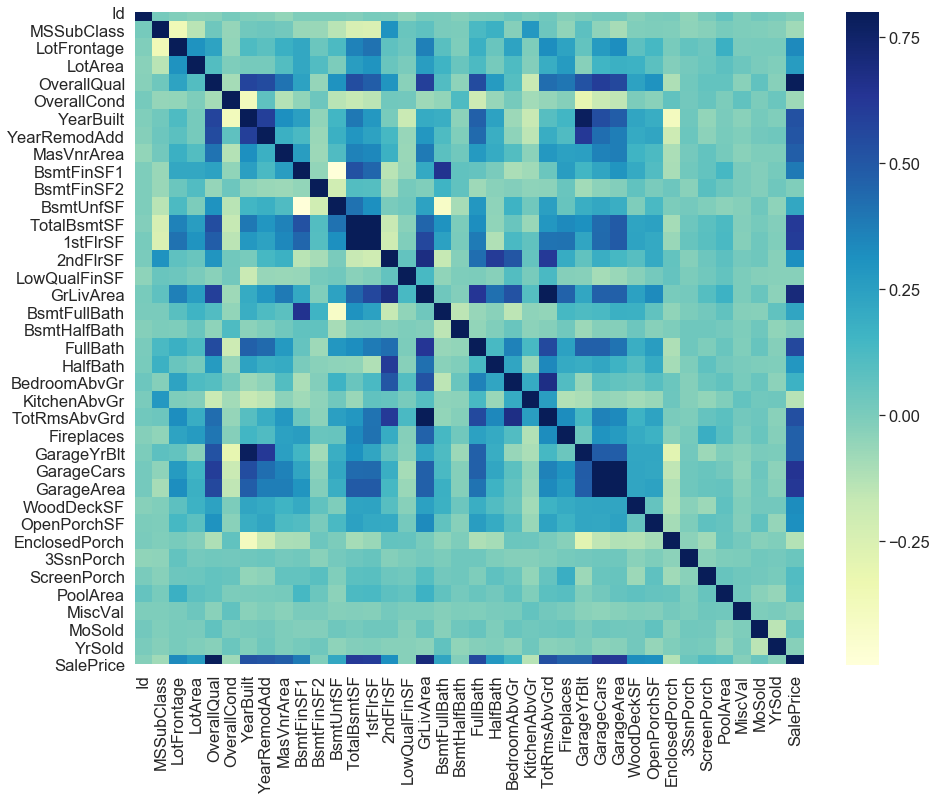

In [18]:
# Correlation matrix

corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");

😯 This is a huge map! In this matrix correlation we can see all the variables listed on the axis, but also a color scale of blues-greens that indicate **strong** or **weak** correlation. Let's clarify the reading of this map:

▪ The right sidebar is a legend with the colors that establish the correlations. Dark blue for **strong correlation** (near to 1) and light blue-green for **weak correlations** (arround 0). As a matter of fact, we see a dark blue diagonal, it is a correlation of 1 of a variable with itself marked in **dark blue**, logic uh?

▪ There are certain areas in the map that seems to be darker than any others. But it is almost imposible to distinguish anything on this big map. What is clear is that there are many variables with weak correlation. That is a relief in the sense of computing calculus. 

▪ But wait 💡 we can have some better idea! Let's make a ZOOM on the **target variable** *SalePrice* and those with a strong correlation with it. 

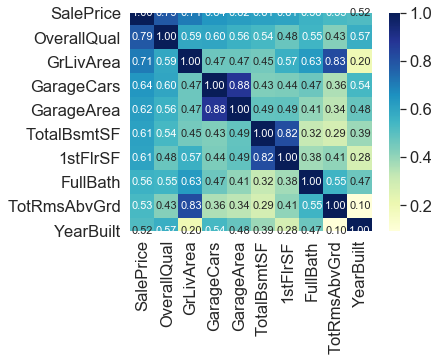

In [13]:
# SalePrice correlation matrix ZOOM

k = 10 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values, cmap="YlGnBu")
plt.show()

According to our ZOOM, these are the variables most correlated with the **target variable** *SalePrice*. Let's point out some ideas:

➡ *OverallQual*, *GrLivArea* and *GarageCars* are strongly correlated with *SalePrice*. Correlations are: 0.79, 0.71 and 0.64, respectively.

➡ *GarageCars* and *GarageArea* are also some of the most strongly correlated variables (correlation = 0.88). There is an obvious relation here, it is logic to think that the number of cars that fit into the garage is a consequence of the garage area. So, we can decide to keep one of them: *GarageCars* (since its correlation with *SalePrice* is higher, look it at the map)

➡ *TotalBsmtSF* and *1stFloor*  also seem to be twin brothers (correlation = 0.82), lets keep *TotalBsmtSF* (both have a correlation of 0.61 with *SalePrice*).

➡ *FullBath* ... Who would expect this? 🤔

➡ *TotRmsAbvGrd* and *GrLivArea* pretty strong correlation (correlation = 0.83), let's keep *GrLivArea* (same reason in the first item).


So, We just analysed five variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering). But stay alert, you may need to learn more about the correct selection of variables. This can be a broad field of study.


Let's continue on the journey 🛤

### Seeking for normality 💆🏻‍♀️🧘🏻‍♀️ (transforming the data)

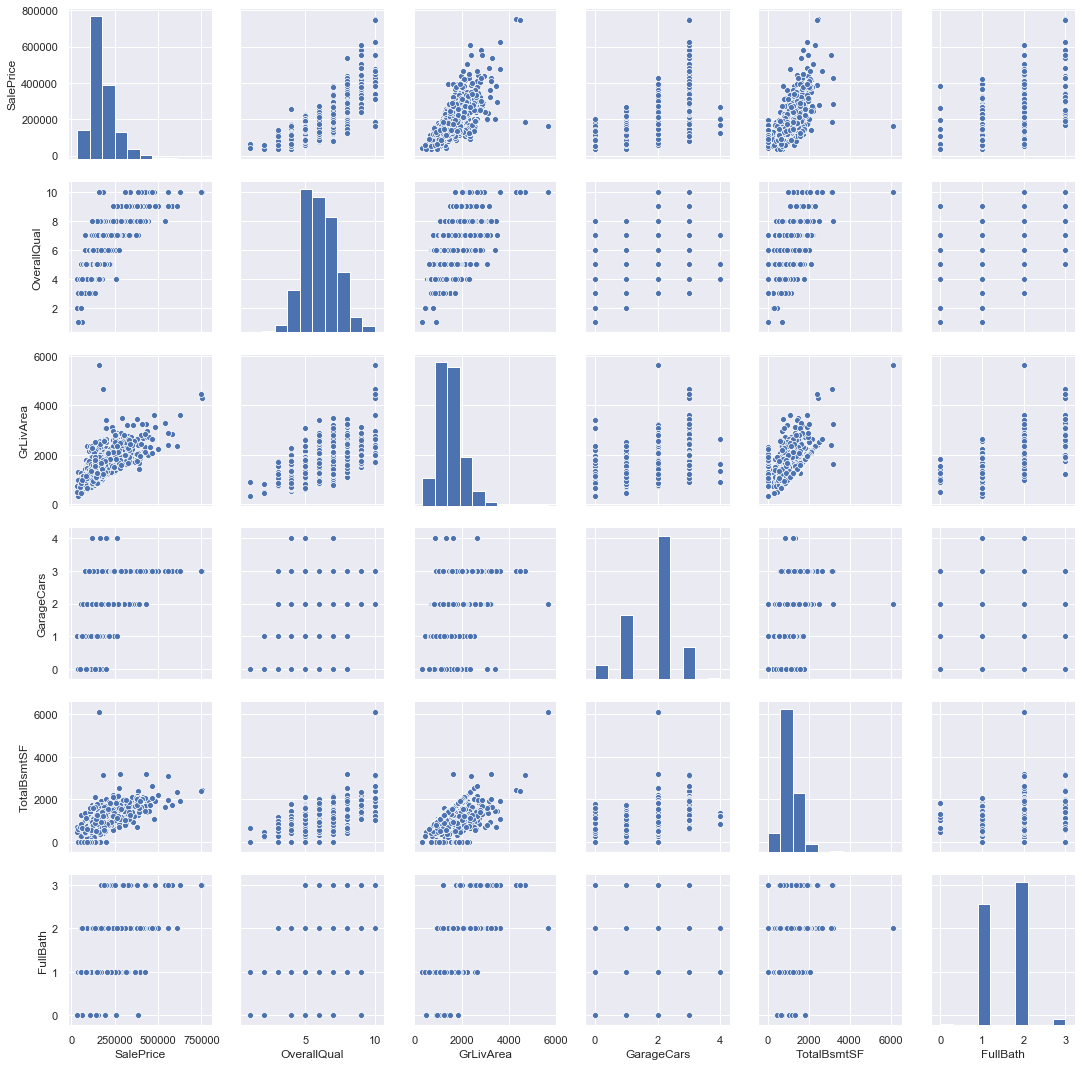

In [20]:
# Scatter plots between the most correlated variables and 'SalePrice'.
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(data_train[cols], height = 2.5)
plt.show();

These plots show a lot of information. The idea is not to be stuck on details that can be retaked more calmly to give a report to a client, for example. But what is important here is the search for **normality**. If we take a look, the plots above show two important views: histograms and some kind of relation (linear, exponential, etc) between *SalePrice* and the rest of the variables in order to make some data transformation that can help to the ML model.

The point here is to test *SalePrice* in a very lean way. We'll do this paying attention to:

1⃣ Histogram.

2⃣ Kurtosis and skewness. 

3⃣ Normal probability plot where data distribution should closely follow the diagonal that represents the normal distribution.

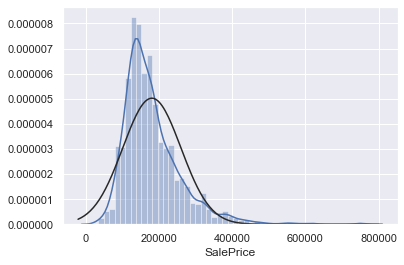

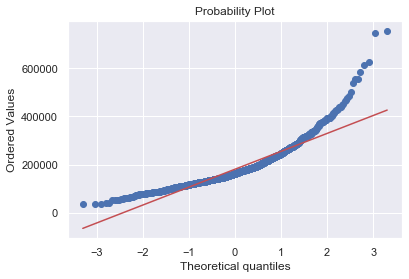

In [21]:
# Histogram and normal probability plot for 'SalePrice'

sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)

Ok, *SalePrice* is not normal. It shows **peakedness**, **positive skewness** and does not follow the **diagonal red line** or the **black gaussian line**.

But everything is not lost. A simple data transformation can solve the problem. In case of positive skewness, **log transformations** usually works well.

**Note:**  A function as `StandardScaler()` can do this on a simple way, also there is a lot of functions on the **scikit learn** preprocessing libray for you to choose. Keep an eye on learning and you'll be surprise!

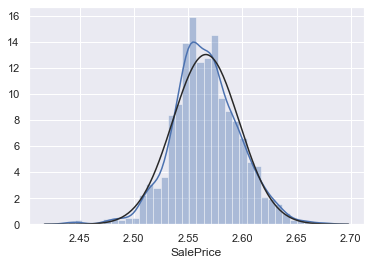

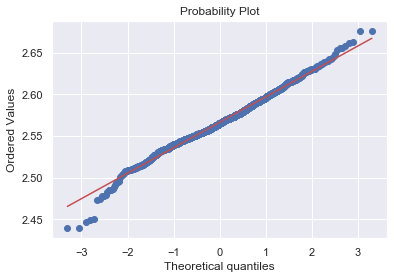

In [23]:
# log data transformation for 'SalePrice'

data_train['SalePrice'] = np.log1p(data_train['SalePrice']).copy()

# Transformed histogram and normal probability plot

sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)

Check the big scatter plot above and let's do this transformation to the variables that need it.

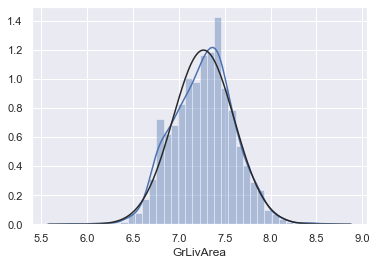

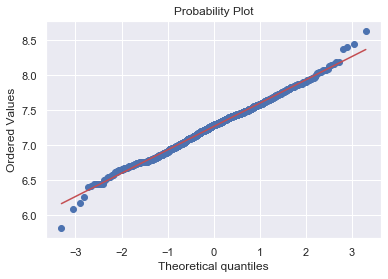

In [24]:
# log data transformation for 'GrLivArea'

data_train['GrLivArea'] = np.log1p(data_train['GrLivArea']).copy()

# Transformed histogram and normal probability plot

sns.distplot(data_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['GrLivArea'], plot=plt)

As *TotalBsmtSF* have a lot of 0 values (A big problem because the value 0 doesn't allow us to do log 
transformations) we have to make a different treatment here: we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [25]:
# Condition: if area > 0 it gets 1, for area==0 it gets 0
data_train['HasBsmt'] = pd.Series(len(data_train['TotalBsmtSF']), index=data_train.index)
data_train['HasBsmt'] = 0 
data_train.loc[data_train['TotalBsmtSF']>0,'HasBsmt'] = 1

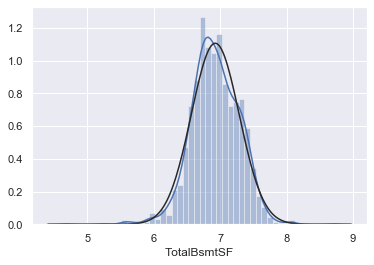

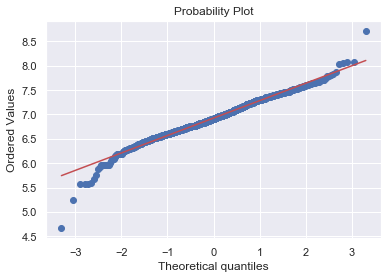

In [17]:
# log data transformation for 'TotalBsmtSF'

data_train.loc[data_train['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(data_train['TotalBsmtSF']).copy()

# Transformed histogram and normal probability plot

sns.distplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# STOP ✋

Let's take a drink and recap 🍸. So far, we have done:

☑ Loading and cleaning of the data.

☑ Seeking correlations, visualizing and transforming data.

**REMAINING JOB**

The steps to building and using a ML model are:

1⃣ **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.


2⃣ **Fit**: Capture patterns from provided data. This is the heart of modeling.

3⃣ **Predict**: This is like it sounds.


4⃣ **Validate**: Determine how accurate the model's predictions are.


## Defining the model and splitting data (training/validation sets)  ✂️

### A brief explanation to be considered

What we want to do here is predict the sale price of a house given labeled training examples (each instance comes with the expected output). In this sense, this is clearly a **supervised learning task**. Moreover, it is also a typical **regression task**, since we are asked to predict a value. More precisely we are performing a **multivariate regression problem** since the system will use multiple features to make a prediction. 

There are many models and advanced regression techniques (Linear, Random Forest, Decision Tree, Kernel Ridge, Lasso, XGBoost, etc.), in our case (just to be quick) we will explore the classical **Linear Regresion** model. Nevertheless, you can practice in analogous way with any other model just following the steps in here. But calm, we will try to make some comparisons with any of these models to make you see that you can improve your results.

As a measure of performance (there are several to compare too) we are going to use **Root Mean Square Error (RMSE)**. It measures the standard deviation of the errors the system makes in its predictions.

To start with all of the above, we need to know that patterns are derived from **training data** (remember here the *data_training* provided for Kaggle), so, the model will be accurate in the **training data**. But if this pattern does not hold when the model sees new data, the model would be very inaccurate when used in practice. One way to prevent this is making measure performance on data that wasn’t used to build the model. Clever uh? 

So, we can exclude some data from the modeling-building process and then use those to test the model’s accuracy. This data is called **validation data**. Remain clear that we will get it from *data_train*.

On the other hand, Kaggle gave us a *data_test* that have all the features on *data_train* except for the **prediction target** *SalePrice*. Later, think of this data as a exterior data to test the model we trained.

So, let's start with the function `train_test_split` from **scikit learn** to split the *data_train* in two pieces. One piece to be use as **training data** to fit the model, and the other as **validation data** to calculate `mean_squared_error`. This will be made for both: **features** and **prediction target**.


In [18]:
# Define prediction target and the features (predictors variables)

y = data_train.SalePrice.copy()

iowa_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']

X = data_train[iowa_features].copy()

# For train_test_split random_state must be set in a value to guarantee the same split in every 
# time we run the code

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42)

# train_X and train_y are the training variables
# val_X and val_y are validating varibles
# By default the funtion select 75% for training and 25% for validating unless you set the parameters

## Fitting the model: Linear Regression 📈

Let's use the most classical model to predict from the **scikit learn** library: `LinearRegression()`. This is the ordinary least squares Linear Regression and fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [19]:
# The Linear Regression Model

iowa_LR_model = LinearRegression()
iowa_LR_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict  🎰

For sure we will interested in predicting sale prices for new houses, for now, on this example, we can check how good the model predicted the prices just comparing the first 5 results with the previous data we know:

In [20]:
print("Making predictions for the following 5 houses:\n ")
print(X.head())
print("\n Actual prices are:\n")
print(y.head())
print("\n The predictions are:\n")
print(iowa_LR_model.predict(val_X.head()))

Making predictions for the following 5 houses:
 
   OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath
0            7   7.444833           2     6.753438         2
1            6   7.141245           2     7.141245         2
2            7   7.488294           2     6.825460         2
3            7   7.448916           3     6.629363         1
4            8   7.695758           3     7.044033         2

 Actual prices are:

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

 The predictions are:

[11.79763491 12.5287397  11.78844981 12.10839051 12.61977943]


**Note**: remember we previously make some log1p transformation on the variables, so, these results actually are not given in a price scale. But do not worry, just apply the function `describe()` to "y" variable and you will see the predictions are on good range. But be careful! on your submission file you must have Id and Sale Price, in that case don't forget use the `inverse` function for `log1p` Do you remember what it is? 🙌

## Validate 📝

In [21]:
# Validate the model

val_predictions_LR = iowa_LR_model.predict(val_X)

# Error calculation

print('MSE = ', np.sqrt(mean_squared_error(val_predictions_LR,val_y)))

MSE =  0.18069748975472635


### Alert for better results! 💯

**Cross Validation** is one of the model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. The goal of cross-validation is to estimate the expected level of fit of a model to a data set that is independent of the data that were used to train the model. To do this we are going to use the function `cross_val_score()` and check there is no variability on the scores for different samples of data.

In [22]:
# Cross Validation Analysis

scores = cross_val_score(iowa_LR_model,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
lin_reg_scores = np.sqrt(-scores)
print("Scores (errors) for 10 samples:\n", lin_reg_scores)
print("\n The mean of errors is: ",lin_reg_scores.mean())

Scores (errors) for 10 samples:
 [0.18006183 0.16694972 0.18740957 0.22629573 0.20754703 0.18594615
 0.17214202 0.17695411 0.16586062 0.14588611]

 The mean of errors is:  0.18150528916106054


#### NICE RESULTS! 🎉
#### It is not so far from what we expected

# Testing the model for an exterior data given for Kaggle (*data_test*) ♻

In this case, we need to take *data_test* and make all over again the cleaning and transformation we did with *data_train*. 

Take in account that we can use a magical thing called `Pipeline` for this. A **Pipeline** is a sequence of data processing components that are very common in ML systems, since there is a lot of data to manipulate and many data transformations to apply. If your are curios, you can learn it appart and skip all the job we have to do next here. 

In [23]:
# Locating and counting missing data in data_test
total_test = data_test.isnull().sum().sort_values(ascending=False)
percent_test = (data_test.isnull().sum()/data_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(34)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [24]:
# Handle remaining missing values on data_test for numerical variables by using mean as replacement

numerical_variables_test = data_test.select_dtypes(exclude = ["object"]).columns
test_num = data_test[numerical_variables_test].copy()

print("NA's for numerical variables in testing data: " + str(test_num.isnull().values.sum()))

test_num = test_num.fillna(test_num.median())

print("Remaining NA's for numerical variables in testing data: " + str(test_num.isnull().values.sum()))

# Saving these changes on data_test

data_test = data_test[numerical_variables_test].fillna(test_num.mean())

NA's for numerical variables in testing data: 330
Remaining NA's for numerical variables in testing data: 0


In [25]:
# Convert categorical variable into dummy

data_test = pd.get_dummies(data_test)

# Check the result! 

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

In [26]:
# log data transformation for 'GrLivArea'

data_test['GrLivArea'] = np.log1p(data_test['GrLivArea']).copy()

# Condition: if area > 0 it gets 1, for area==0 it gets 0
data_test['HasBsmt'] = pd.Series(len(data_test['TotalBsmtSF']), index=data_test.index)
data_test['HasBsmt'] = 0 
data_test.loc[data_test['TotalBsmtSF']>0,'HasBsmt'] = 1

# log data transformation for 'TotalBsmtSF'

data_test.loc[data_test['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(data_test['TotalBsmtSF']).copy()


## Runing the model to predict SalePrice with new data ♻

The *data_train* we used to train our model have information for 1460 houses (Id numbers from 1 to 1460). While *data_test*  (provided for Kaggle) have all the features for 1459 houses except *SalePrice* (Id numbers from 1461 to 2919). The goal here is to use our trained model and save a file with the Id number and the price predicted. Let's go!

In [27]:
# Features in the new data

X_test = data_test[iowa_features].copy()
X_test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath
0,5,6.799056,1.0,6.783325,1
1,6,7.192934,1.0,7.192934,1
2,5,7.396335,2.0,6.834109,2
3,6,7.380879,2.0,6.831954,2
4,8,7.155396,2.0,7.155396,2
...,...,...,...,...,...
1454,4,6.996681,0.0,6.304449,1
1455,4,6.996681,1.0,6.304449,1
1456,5,7.110696,2.0,7.110696,1
1457,5,6.878326,0.0,6.816736,1


Let's do something smart, we will train our model with all the data and then we will make prediction with the new *X_test*.

In [28]:
# Train the model again but now with all the data X and y

iowa_LR_model.fit(X, y)

# Predict the Sale Price for 1459 houses with new features data X_test

test_predictions_LR = iowa_LR_model.predict(X_test)

# Let's show a few predictions 

print("\n The first 5 predictions are:\n")

print(iowa_LR_model.predict(X_test.head()))


 The first 5 predictions are:

[11.60779571 11.89060733 11.97652639 12.09671398 12.27970808]


Well we are all done!

Now we can save as an output file the Id of the house and the predicted sale price 😉 

Did you remember what is the inverse of `logp1`? 

`expm1` is! Let's use it to give the right scale prices.

In [29]:
# Saving the output 
output = pd.DataFrame({'Id': data_test.Id, 'SalePrice': np.expm1(test_predictions_LR)})
output.to_csv('submission_V1.csv', index=False)

# Showing a few of this file
output.head(n=10)

,Id,SalePrice
0,1461,109950.618119
1,1462,145888.873594
2,1463,158977.840474
3,1464,179280.770314
4,1465,215281.862702
5,1466,179976.218617
6,1467,162352.431790
7,1468,172491.193661
8,1469,187275.692427
9,1470,108863.628658


# Being curious about other models 🤓

As I said before, there are other regressive models that could improve the results. This is a broad field to be explored. We can compare the results of our classic **Linear Regression** model with a very striking model like the **Random Forest**, have you heard about it? 

Of course, recently there is a model with a lot of fame and pretty good results predicting: **XGBoost**, for which we would need another tutorial because there are parameters involved that must be studied very carefully. All this new tools are develop to manage something you have to investigate more about: *Overfitting* and *Underfitting*. We will do our first test with **Random Forest** and I invite you to look for information about the rest of the models to expand your knowledge.

According to the Python documentation a **Random Forest** is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. In our case, we need to know more about this term "over-fitting" to see if we are over estimating with our model. But don't be alarmed, let's just take a look at the results and keep exploring. 

## The Random Forest Model 🌲🌲🌲🌲

Let's define our model and train it with the previous spliting data_train

In [30]:
# The Randonm Forest Model

iowa_RF_model = RandomForestRegressor(random_state=1)

iowa_RF_model.fit(train_X, train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

## Validating the model and comparing errors 🙌

Here we are going to Validate the Random Forest model with the val_X features and compare **Mean Squared Errors** in both, Linear Regression and Random Forest.

In [31]:
# Validate the model

val_predictions_RF = iowa_RF_model.predict(val_X)

# Error calculation between the two models 

print('MSE for Linear Regression Model = ', np.sqrt(mean_squared_error(val_predictions_LR,val_y)))
print('MSE for Random Forest Model = ', np.sqrt(mean_squared_error(val_predictions_RF,val_y)))

MSE for Linear Regression Model =  0.18069748975472635
MSE for Random Forest Model =  0.17013164965384148


We see a little improvement of the results, don't be shy and explore some other models to get it better. 

## Better predictions and submitting results 📬

In [32]:
# To improve accuracy, create a new Random Forest model which you will train on all training data


# Fit iowa_RF_model on all data from the training data, remember X and y.

iowa_RF_model.fit(X, y)

# Make the predictions with X_test

test_predictions_RF = iowa_RF_model.predict(X_test)

# Save the submission file with this results

output = pd.DataFrame({'Id': data_test.Id, 'SalePrice': np.expm1(test_predictions_RF)})
output.to_csv('submission_V2.csv', index=False)


Well we are finished!

I hope this little tutorial has helped you to get started in the world of Machine Learning. Take this notebook and play with it as many times as you wish. See you in our next tutorial!👋